In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

os.listdir()

['.ipynb_checkpoints',
 'covid19-global-forecasting-week-1.zip',
 'submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [169]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub =pd.read_csv('submission.csv')

In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
ForecastId        12212 non-null int64
Province/State    5590 non-null object
Country/Region    12212 non-null object
Lat               12169 non-null float64
Long              12169 non-null float64
Date              12212 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 572.5+ KB


In [171]:
print(df.shape)
df.head()

(16756, 8)


,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [172]:
print(test.shape)
test.head()

(12212, 6)


,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [173]:
print(sub.shape)
sub.head()

(12212, 3)


,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16756 entries, 0 to 16755
Data columns (total 8 columns):
Id                16756 non-null int64
Province/State    7670 non-null object
Country/Region    16756 non-null object
Lat               16697 non-null float64
Long              16697 non-null float64
Date              16756 non-null object
ConfirmedCases    16756 non-null float64
Fatalities        16756 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [175]:
df.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,16756.000000,16697.000000,16697.000000,16756.000000,16756.000000
mean,13189.500000,26.337324,5.039603,271.750119,9.221533
std,7624.686932,22.963063,79.935267,3261.152305,141.524582
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.250000,13.193900,-71.530100,0.000000,0.000000
50%,13189.500000,33.000000,10.000000,0.000000,0.000000
75%,19783.750000,42.506300,65.000000,7.000000,0.000000
max,26378.000000,72.000000,174.886000,67800.000000,4032.000000


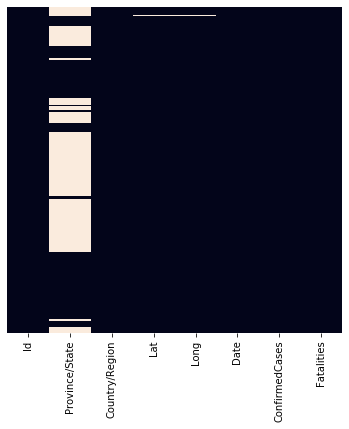

In [176]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [177]:
df['Province/State'] = df['Province/State'].fillna('missing')

In [178]:
x = df.groupby('Country/Region').max().index
y = df.groupby('Country/Region').max()['ConfirmedCases']

In [180]:
df.groupby('Country/Region').max()

,Id,Province/State,Lat,Long,Date,ConfirmedCases,Fatalities
Country/Region,,,,,,,
Afghanistan,59,missing,33.0000,65.0000,2020-03-20,24.0,0.0
Albania,152,missing,41.1533,20.1683,2020-03-20,70.0,2.0
Algeria,245,missing,28.0339,1.6596,2020-03-20,90.0,11.0
Andorra,338,missing,42.5063,1.5218,2020-03-20,75.0,0.0
Antigua and Barbuda,431,missing,17.0608,-61.7964,2020-03-20,1.0,0.0
Argentina,524,missing,-38.4161,-63.6167,2020-03-20,128.0,3.0
Armenia,617,missing,40.0691,45.0382,2020-03-20,136.0,0.0
Aruba,710,missing,NaN,NaN,2020-03-20,0.0,0.0
Australia,1547,Western Australia,35.4437,153.4000,2020-03-20,353.0,6.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162]),
 <a list of 163 Text xticklabel objects>)

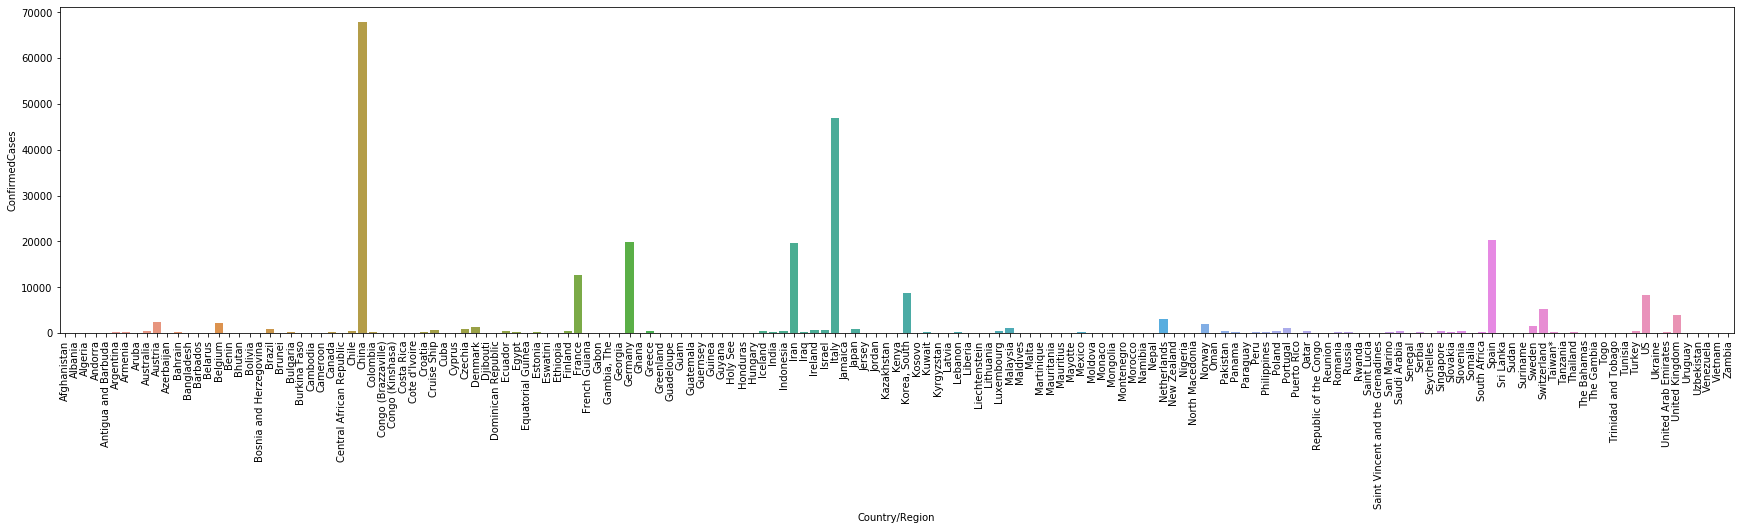

In [191]:
%matplotlib inline
plt.figure(figsize=(30,6))
sns.barplot(x, y)
plt.xticks(rotation = 90)

In [122]:
df['Province/State'].nunique()

129

In [137]:
def cleanup(col):
    if col != 'missing':
        return 'not_missing'
    else:
        return 'missing'

In [138]:
df['Province/State'].apply(cleanup).head()

0    missing
1    missing
2    missing
3    missing
4    missing
Name: Province/State, dtype: object

In [139]:
df['Province/State'].value_counts().head()

missing             9086
Grand Princess       118
Diamond Princess     118
Mayotte               59
Quebec                59
Name: Province/State, dtype: int64

In [140]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,missing,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,missing,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,missing,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,missing,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,missing,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [141]:
df['Country/Region'].nunique()

163

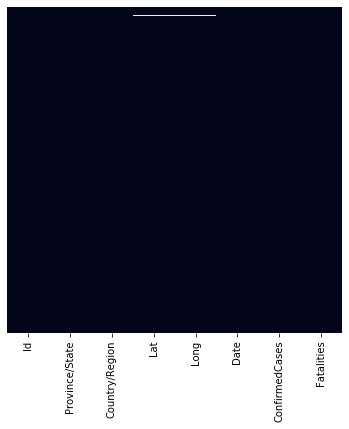

In [142]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [149]:
df[df['ConfirmedCases']==24].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
58,59,missing,Afghanistan,33.0000,65.0000,2020-03-20,24.0,0.0
168,237,missing,Algeria,28.0339,1.6596,2020-03-12,24.0,1.0
1646,2565,missing,Bosnia and Herzegovina,43.9159,17.6791,2020-03-15,24.0,0.0
2590,4053,Quebec,Canada,52.9399,-73.5491,2020-03-15,24.0,0.0
3016,4751,Gansu,China,37.8099,101.0583,2020-01-29,24.0,0.0


In [150]:
df['Date'] = pd.to_datetime(df['Date'], "%Y-%m-%d")

In [155]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [156]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Month,Day
0,1,missing,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,1,22
1,2,missing,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,1,23
2,3,missing,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,1,24
3,4,missing,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,1,25
4,5,missing,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,1,26
